In [1]:
# prompt: import numpy as np

import numpy as np
import pandas as pd


In [2]:
!pip install chardet

In [3]:
import chardet

In [4]:
with open('spam.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [5]:
df = pd.read_csv('spam.csv', encoding=encoding)

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

steps:-
1-data cleaning
2-EDA
3-text preprocessing
4-model bulding
5-evaluation
6-improvement
7-website
8-deployment on heruku

## 1 Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [10]:
df.sample(7)

,v1,v2
2277,ham,Hello! How r u? Im bored. Inever thought id ge...
3730,ham,Isn't frnd a necesity in life? imagine urself ...
3894,ham,Yes. Last practice
5294,spam,XMAS iscoming & ur awarded either å£500 CD gif...
43,ham,WHO ARE YOU SEEING?
1043,ham,Mmm thats better now i got a roast down me! iå...
846,ham,My stomach has been thru so much trauma I swea...


In [11]:
## renameing
df.rename(columns={"v1":"target","v2":"text"},inplace=True)


In [12]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [14]:
df["target"]=encoder.fit_transform(df["target"])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
## missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
## duplicate values
df.duplicated().sum()

403

In [18]:
## remove duplicates
df=df.drop_duplicates(keep="first")

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

## EDA

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

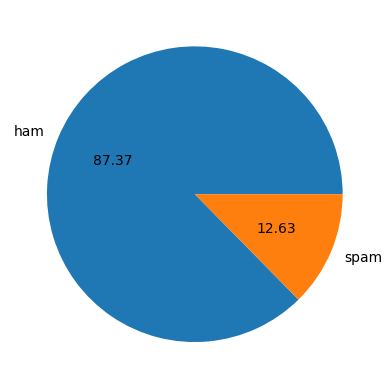

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()


In [24]:
## data is imbalanced

In [25]:
## to make different clumns(num_char,num_words,num_sent)
## natural language tool kit(nltk) it is nlp library
import nltk

In [26]:
## to download nltk dependecies
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
df['num_char']= df['text'].apply(len)

In [28]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head()

,target,text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
## for both ham and spam
df[['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
## for ham message
df[df['target']==0][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
## for spam message
df[df['target']==1][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

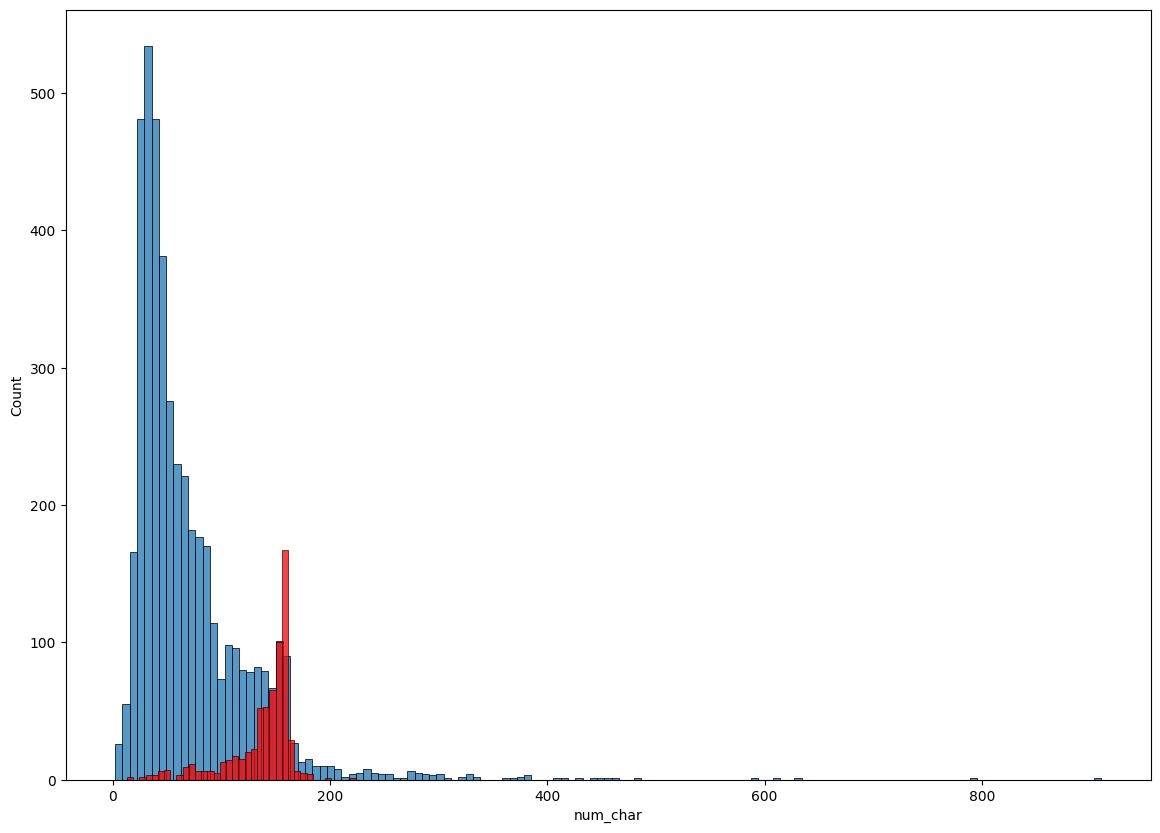

In [37]:
plt.figure(figsize=(14,10))
sns.histplot(df[df['target']==0]["num_char"])
sns.histplot(df[df['target']==1]["num_char"],color='red')

<Axes: xlabel='num_word', ylabel='Count'>

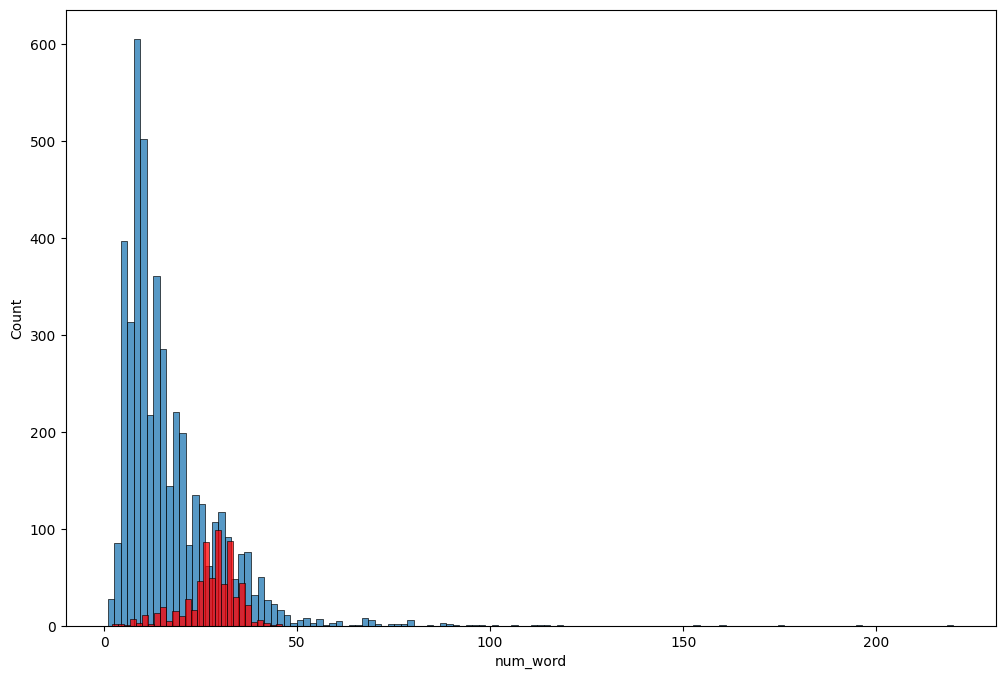

In [38]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]["num_word"])
sns.histplot(df[df['target']==1]["num_word"],color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

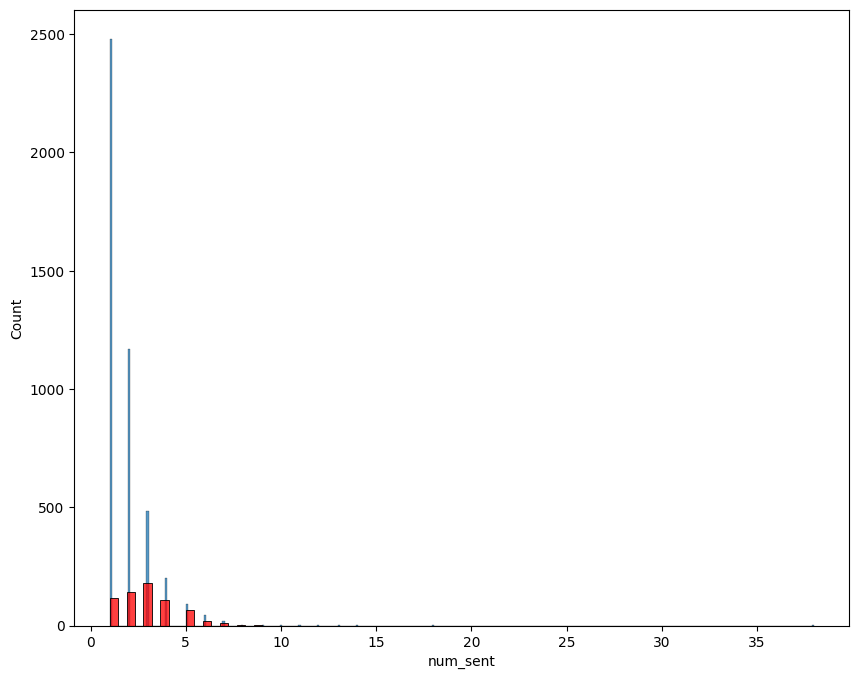

In [39]:
plt.figure(figsize=(10,8))
sns.histplot(df[df['target']==0]["num_sent"])
sns.histplot(df[df['target']==1]["num_sent"],color='red')

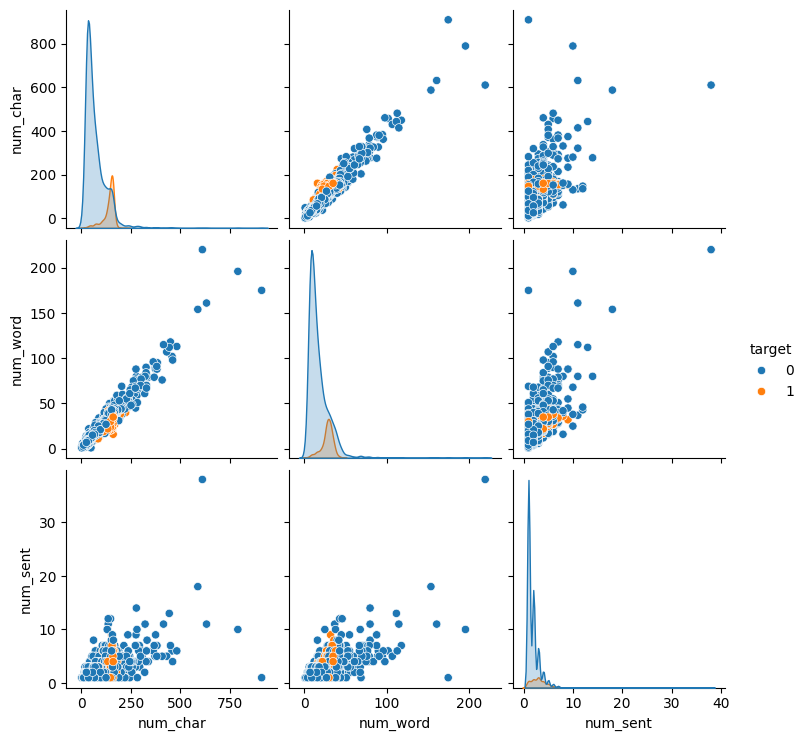

In [40]:
sns.pairplot(df,hue='target')

<ipython-input-41-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

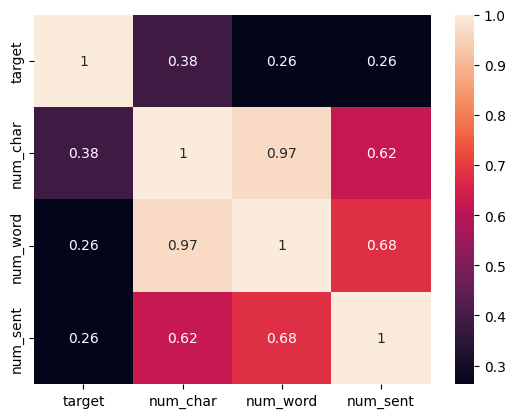

In [41]:
sns.heatmap(df.corr(),annot=True)

## Data preproceesing
 * Lower Case
 * Tokenization
 * Removing Special Characters
 * Removing Stop Words and Punctuation
 * Stemming(removing semiler character like dance ,dancing..)

In [42]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [43]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [44]:
## no contibution for sentence meaning
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
     if i  not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [46]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
!pip install stopwords
import stopwords

In [48]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("dancing")

'danc'

In [52]:
transform_text("FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv ")

'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv'

In [53]:
df['text'][5]

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [54]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_char,num_word,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
from wordcloud import WordCloud
wc=WordCloud(height=300,width=300,min_font_size=10,background_color='blue')

In [56]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

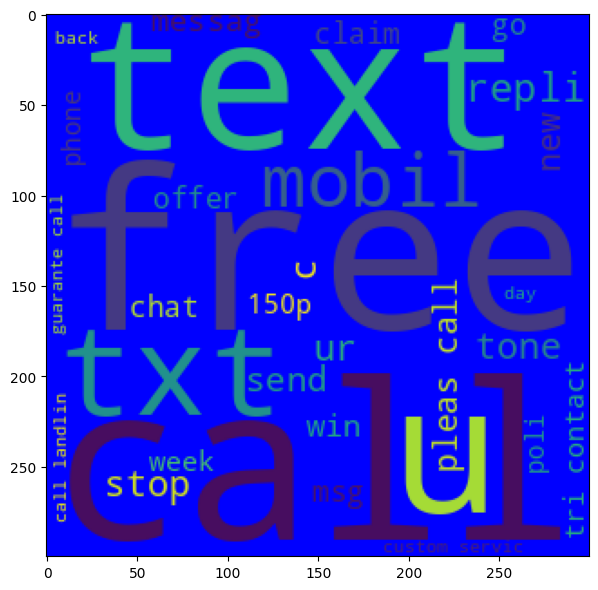

In [57]:
plt.figure(figsize=(7,8))
plt.imshow(spam_wc)


In [58]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))


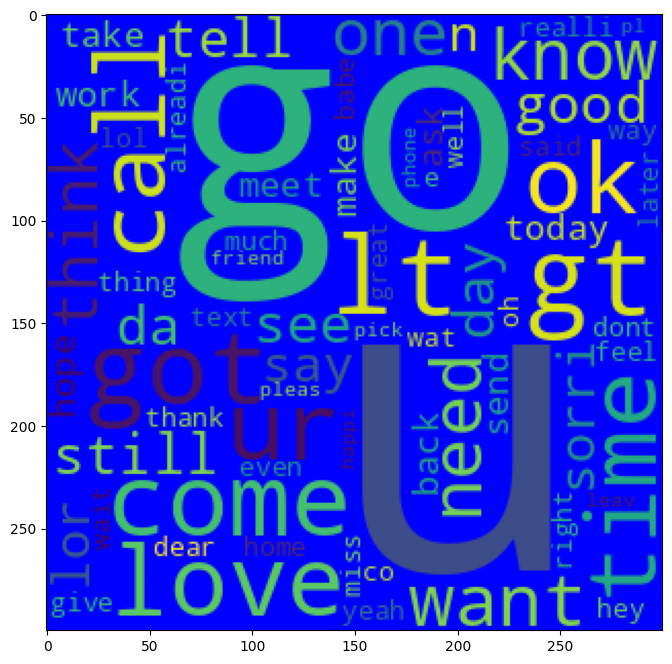

In [59]:
plt.figure(figsize=(10,8))
plt.imshow(ham_wc)

In [60]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [61]:
len(spam_corpus)

9939

In [62]:
from collections import Counter
df1=pd.DataFrame(Counter(spam_corpus).most_common(30))

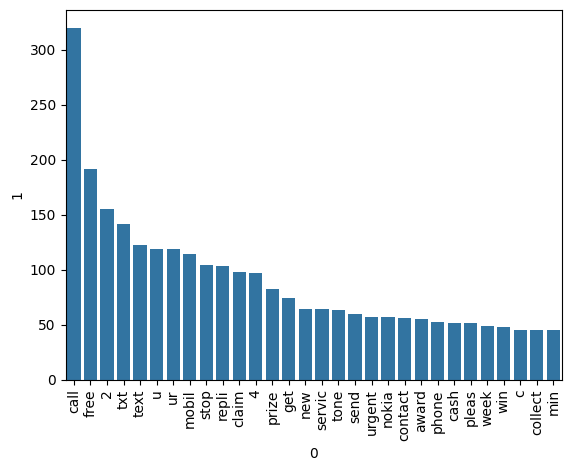

In [63]:
sns.barplot(x=df1[0],y=df1[1])
plt.xticks(rotation='vertical')
plt.show()

In [105]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [106]:
len(ham_corpus)

35404

In [107]:
from collections import Counter
df2=pd.DataFrame(Counter(ham_corpus).most_common(30))

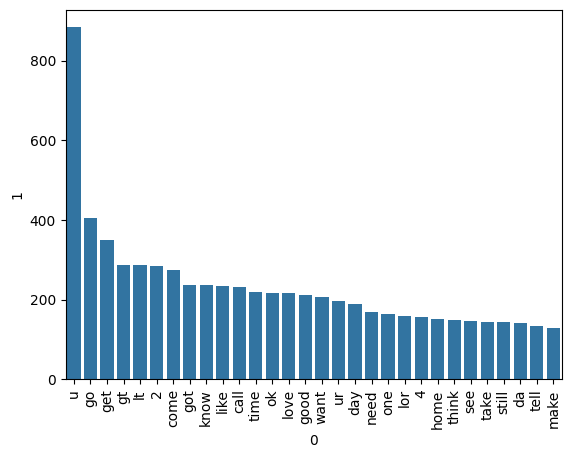

In [108]:
sns.barplot(x=df2[0],y=df2[1])
plt.xticks(rotation="vertical")
plt.show()

## Module Bulding by naive baise(good for textual data)

In [67]:
## first convert text input into numeric values or vectors
  ## 1-> bag of words(in this we create a column of frequent words)
  ## 2-> TFIDF
  ## 3-> word to word

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()


In [69]:
x=cv.fit_transform(df['transformed_text']).toarray()

In [70]:
x.shape

(5169, 6708)

In [159]:
y=df['target'].values

In [160]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [149]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [150]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [151]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [76]:
gnb.fit(X_train,Y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))

0.8800773694390716
0.5315315315315315
[[792 104]
 [ 20 118]]


In [77]:
## in imbalanced data precession_score metters more than accuracy_socre
mnb.fit(X_train,Y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))

0.9642166344294004
0.8344370860927153
[[871  25]
 [ 12 126]]


In [78]:
bnb.fit(X_train,Y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))

0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]


## Apply TFIDF

In [190]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()


In [167]:
x1=tfidf.fit_transform(df['transformed_text']).toarray()

In [168]:
x1.shape

(5169, 3000)

In [169]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x1,y,test_size=0.2,random_state=2)

In [170]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [171]:
gnb.fit(X_train,Y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))

0.8694390715667312
0.5068493150684932
[[788 108]
 [ 27 111]]


In [172]:
mnb.fit(X_train,Y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [173]:
bnb.fit(X_train,Y_train)
y_pred1=bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


In [174]:
## Use mnb of tfidf

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRFClassifier

In [176]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgbc=XGBRFClassifier(n_estimators=50,random_state=2)

In [177]:
clfs={
      'SVC': svc,
      'KN': knc,
      'NB': mnb,
      'DT': dtc,
      'LR': lrc,
      'RF': rfc,
      'AdaBoost': abc,
      'Bgc': bc,
      'ETC': etc,
      'GBDT': gbc,
      'XGBC': xgbc
}


In [178]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
  clf.fit(X_train,Y_train)
  y_pred=clf.predict(X_test)
  accuracy = accuracy_score(Y_test,y_pred)
  precision = precision_score(Y_test,y_pred)

  return accuracy,precision

In [179]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9758220502901354, 0.9747899159663865)

In [180]:
train_classifier(abc,X_train,Y_train,X_test,Y_test)

(0.960348162475822, 0.9292035398230089)

In [181]:
accuracy_scores=[]
precision_scores=[]

for name , clf in clfs.items():

    current_accuracy , current_precision = train_classifier(clf,X_train,Y_train,X_test,Y_test)

    print('for' , name)
    print('accuracy', current_accuracy)
    print('precision' , current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for SVC
accuracy 0.9758220502901354
precision 0.9747899159663865
for KN
accuracy 0.9052224371373307
precision 1.0
for NB
accuracy 0.9709864603481625
precision 1.0
for DT
accuracy 0.9313346228239845
precision 0.8252427184466019
for LR
accuracy 0.9584139264990329
precision 0.9702970297029703
for RF
accuracy 0.9758220502901354
precision 0.9829059829059829
for AdaBoost
accuracy 0.960348162475822
precision 0.9292035398230089
for Bgc
accuracy 0.9584139264990329
precision 0.8682170542635659
for ETC
accuracy 0.9748549323017408
precision 0.9745762711864406
for GBDT
accuracy 0.9468085106382979
precision 0.9191919191919192
for XGBC
accuracy 0.9400386847195358
precision 0.8275862068965517


In [182]:
## we have to focuse on precision
performance_df=pd.DataFrame({"Algo":clfs.keys(),"Accuracy":accuracy_scores,"precision":precision_scores}).sort_values("precision",ascending=False)

In [183]:
performance_df

,Algo,Accuracy,precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,Bgc,0.958414,0.868217
10,XGBC,0.940039,0.827586


In [184]:
performance_df1=pd.melt(performance_df,id_vars="Algo")

In [185]:
performance_df1

,Algo,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,GBDT,Accuracy,0.946809
8,Bgc,Accuracy,0.958414
9,XGBC,Accuracy,0.940039


In [186]:
## Model impurove
## change the max parameter of TFIDF

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)


In [192]:
x1=tfidf.fit_transform(df['transformed_text']).toarray()

In [193]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x1,y,test_size=0.2,random_state=2)

In [222]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [223]:
gnb.fit(X_train,Y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))

0.8723404255319149
0.5128205128205128
[[782 114]
 [ 18 120]]


In [224]:
mnb.fit(X_train,Y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))

0.9787234042553191
0.9461538461538461
[[889   7]
 [ 15 123]]


In [225]:
bnb.fit(X_train,Y_train)
y_pred1=bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


In [213]:
temp_df = pd.DataFrame({"Algo":clfs.keys(),"Accuracy_max_ft_3000":accuracy_scores,"precision_max_ft_3000":precision_scores})

In [214]:
new_df=performance_df.merge(temp_df,on="Algo")

In [215]:
new_df

,Algo,Accuracy,precision,Accuracy_max_ft_3000,precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204
7,GBDT,0.946809,0.919192,0.946809,0.919192
8,Bgc,0.958414,0.868217,0.958414,0.868217
9,XGBC,0.940039,0.827586,0.940039,0.827586


In [216]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)


In [217]:
x1=tfidf.fit_transform(df['transformed_text']).toarray()

In [218]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler() ## standard_scaler gives negative values and naive_bayes does not accepet negative values
x1=scaler.fit_transform(x1)

In [219]:
y=df['target'].values

In [220]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [221]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x1,y,test_size=0.2,random_state=2)

In [ ]:
## Reexecute  all the cells from previous steps

In [226]:
temp_df = pd.DataFrame({"Algo":clfs.keys(),"Accuracy_scaling":accuracy_scores,"precision_scaling":precision_scores})

In [229]:
new_df_scaled=new_df.merge(temp_df,on="Algo")

In [230]:
new_df_scaled

,Algo,Accuracy,precision,Accuracy_max_ft_3000,precision_max_ft_3000,Accuracy_scaling,precision_scaling
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,Bgc,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,XGBC,0.940039,0.827586,0.940039,0.827586,0.940039,0.827586


In [ ]:
## scaling is not effective so we are removing it